# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#ascertain what elements are in citipy library
print(dir(citipy))

['City', 'WORLD_CITIES_DICT', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_current_dir', '_current_filename', '_world_cities_csv_path', '_world_cities_kdtree', 'c', 'cities', 'city', 'city_coordinate_key', 'csv', 'csv_file', 'kdtree', 'nearest_city', 'os']


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination (citipy-specific functions)
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#URL syntax for OpenWeather api call
ow_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
#will need additional URL for loop querying by city id + city

#placeholders for loop retrievals
city_num = []
city_name = []
countries = []
date = []
max_temp = []
humidity = []
windy = []
cloudy = []
latitude=[]
longitude =[]

#using city in citipy cities list, query openweather via api call syntax to obtain and hold weather data for each
for city in cities:
    data = requests.get(ow_url).json()
    #create query url
    ow_query_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q=" + city
    response = requests.get(ow_query_url).json()
    
    try:  
        city_id = response['id']
        city_num.append(city_id)
        citynm = response['name']
        city_name.append(citynm)
        today_date = response['dt']
        date.append(today_date)
        country_code = response['sys']['country']
        countries.append(country_code)
        temp = response['main']['temp_max']
        max_temp.append(temp)
        hum = response['main']['humidity']
        humidity.append(hum)
        wind = response['wind']['speed']
        windy.append(wind)
        cloud = response['clouds']['all']
        cloudy.append(cloud)
        lat = response['coord']['lat']
        latitude.append(lat)
        lng = response['coord']['lon']
        longitude.append(lng)

    except KeyError:
        print(city_id, city)

933815 illoqqortoormiut
3466165 severnyy
3424607 sentyabrskiy
3894426 barentsburg
3421765 porto santo
556268 babanusah
4035715 mys shmidta
4035715 bengkulu
1490256 maloshuyka
3571913 unye
3622228 vaitupu
1507390 wulanhaote
3428576 taolanaro
3423146 rungata
5830062 ust-kamchatsk
5830062 korla
5830062 grand river south east
5690532 tsihombe
6089245 belushya guba
2112802 benha
1848976 tawkar
1337606 raga
1274021 asau
3581398 dien bien
3377301 bacuit
3377301 louisbourg
3377301 saryshagan
5826027 nizhneyansk
2017155 tabiauea
2017155 palabuhanratu
6542155 wolmaranstad
895269 uskedal
477958 kamenskoye
1511736 fevralsk
5960603 amderma
1805857 tukrah
4407665 yirol
602913 turtkul
2737599 samusu
3865086 tarudant
6111862 svetlyy
5354943 attawapiskat
3395981 saleaula
1484892 marcona
2618795 sinkat
2122493 kusk
2093691 tumannyy
2126199 lolua
1849876 sapao
2399959 ngukurr
1279154 sao raimundo nonato
1637001 katsiveli
1175296 tasbuget
5975004 bokspits
265040 umm jarr
2998286 krasnoselkup
3356832 dolbe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a data frame to capture city, latitude, temperature (f), humidity (%), cloudiness (%) and windspeed (mph); check loop totals
city_weather_df = pd.DataFrame({"City": city_name, "Cloudiness": cloudy,"Country": countries, "Date": date, "Humidity": humidity, "Lat": latitude,"Lng": longitude, "Max Temp": max_temp, "Wind Speed": windy})
city_weather_df.count()

City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Lat           566
Lng           566
Max Temp      566
Wind Speed    566
dtype: int64

In [6]:
city_weather_df = pd.DataFrame({"City": city_name, "Cloudiness": cloudy,"Country": countries, "Date": date, "Humidity": humidity, "Lat": latitude,"Lng": longitude, "Max Temp": max_temp, "Wind Speed": windy})
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ovalle,0,CL,1568500139,52,-30.60,-71.20,58.17,7.87
1,Albany,75,US,1568500017,77,42.65,-73.75,69.01,9.17
2,Fomboni,0,KM,1568500139,73,-12.28,43.74,77.79,6.11
3,Chuy,77,UY,1568500139,87,-33.69,-53.46,56.37,12.39
4,Puerto Ayora,75,EC,1568500140,60,-0.74,-90.35,75.20,6.93


In [7]:
#export dataframe to csv
city_weather_df = city_weather_df.dropna()
city_weather_df.to_csv('../data/output_data_file.csv')

# Plotting the Data
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

In [8]:
#Your objective is to build a series of scatter plots to showcase the following relationships

#assign date and time to scatterplot analyses
import time
here_and_now = time.ctime(today_date)
print(here_and_now)

Sat Sep 14 18:31:36 2019


# Latitude vs. Temperature Plot

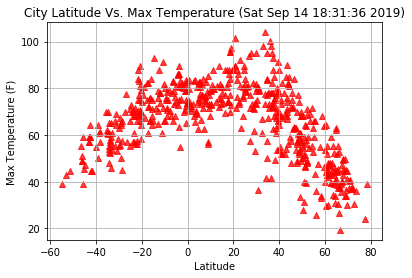

In [15]:
#Temperature (F) vs. Latitude
plt.scatter(latitude, max_temp, marker="^", facecolors="red", alpha=0.75)
plt.grid(linestyle='-')
x_lim = 100
plt.title("City Latitude Vs. Max Temperature" + " " +"("+ here_and_now+")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#save plot to a .png file
plt.savefig("../results/City_latitude_Vs_Max_Temperature.png")
plt.show()

In [10]:
#save above plot to a .png file
plt.savefig("../Results/City_latitude_Vs_Max_Temperature.png")
#have to run plt.show() again or image will not render in .png
plt.show()

<Figure size 432x288 with 0 Axes>

# Latitude vs. Humidity Plot

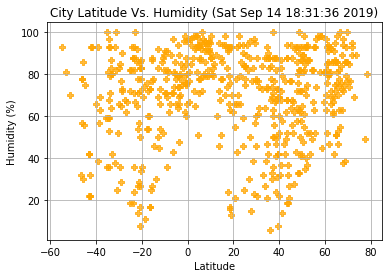

In [11]:
#Humidity (%) vs. Latitude
plt.scatter(latitude, humidity, marker="P", facecolors="orange", alpha=0.75)
plt.grid(linestyle='-')
x_lim = 100
plt.title("City Latitude Vs. Humidity" + " " +"("+ here_and_now+")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("../results/City_latitude_Vs_Humidity.png")
plt.show()

# Latitude vs. Cloudiness Plot

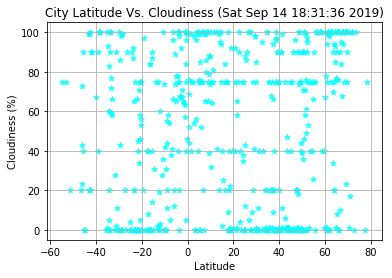

In [12]:
#Cloudiness (%) vs. Latitude
plt.scatter(latitude, cloudy, marker="*", facecolors="aqua", alpha=0.75)
plt.grid(linestyle='-')
x_lim = 100
plt.title("City Latitude Vs. Cloudiness" + " " +"("+ here_and_now+")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("../results/City_latitude_Vs_Cloudiness.png")
plt.show()

# Latitude vs. Wind Speed Plot

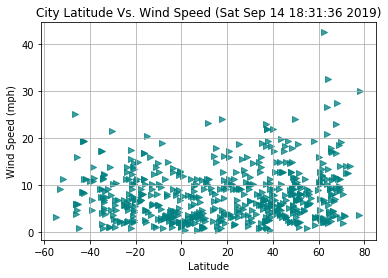

In [13]:
#Wind Speed (mph) vs. Latitude
plt.scatter(latitude, windy, marker=">", facecolors="teal", alpha=0.75)
plt.grid(linestyle='-')
x_lim = 100
plt.title("City Latitude Vs. Wind Speed" + " " +"("+ here_and_now+")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("../results/City_latitude_Vs_Windspeed.png")
plt.show()

# Findings

In [14]:
#You must include a written description of three observable trends based on the data.

--Temperature is pretty dramatically higher near and just above the equator, but it seems others of these are less significant an will change each time the api is called and the code run.